<a href="https://colab.research.google.com/github/OlegKov33/CM4107_Advanced_AI_Coursework/blob/main/CM4107_Advanced_AI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Working Dataset

In [81]:
### Long story short, the original sentiment dataset that was used, decided not to work. Making this small(496) dataset be the replacmcent for sentiment 1.4M.
## https://www.kaggle.com/datasets/kevserbrayildirim/sentiment140
## https://huggingface.co/google/electra-small-discriminator
## https://huggingface.co/xlnet/xlnet-base-cased


'''
1. Installs for transformers, dataset and accelerate
2. Imports for ELECTRA, XLNet and Trainer
3. train and test data splitter
4. pandas (needed for getting csv file onto colab enviroment)
5. accuracy score
6. warnings
7. numpy - useful tool
8. plot - useful tool that will be used with Tf-Idf and PCA later
9. Tf-Idf - how frequently a word has appeared
10. PCA - uses Tf-Idf to get x,y or x,y,z coordinates for plots
11. 3D - used to create 3d plots
'''
!pip install transformers datasets accelerate
from transformers import ElectraTokenizerFast, ElectraForSequenceClassification, XLNetTokenizer, XLNetForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# Getting to know the dataset
sentiment = pd.read_csv("new_test_data_s140.csv")
sentiment['Polarity'].value_counts()
# 0,2,4 ... (I will change them slighty. I will change the order into 0,4,2 and then replace it with 0,1,2)


# 0 is bad, 1 is good, 2 is ok
# 0 will be 0, 2 (okay), 4(will be 1)
sentiment['Polarity'] = sentiment['Polarity'].map({0: 0, 2: 2, 4: 1})
sentiment = sentiment.drop(columns=['Id'])
#sentiment.columns

### ELECTRA algorithm (2 labels) [16 training batch]

In [ ]:
# Getting ELECTRA ready.
model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=2)


# Getting dataset ready for 2 labels
sentiment_2_labels = sentiment
sentiment_2_labels = sentiment_2_labels[(sentiment_2_labels['Polarity'] != 2)]


# Getting data ready for training
def preprocess_function(input_data):
    # Renames "sentiment" to "labels"
    input_data['labels'] = input_data['Polarity']
    #returns ELECTRA tokenizer with padding(fills space if needed), truncation (if given more than 128, shrink it down). max_length... is... max_length.
    return tokenizer(input_data["Text"], padding='max_length', truncation=True, max_length=128)


# Getting data divided into train and test
train_df, test_df = train_test_split(sentiment_2_labels, test_size=0.2, random_state=322)


# Using the above data, assign them to train/test datasets for model below
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


# Getting tokenize ready with the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


# Getting trainer ready, and giving training parameters
training_args = TrainingArguments(
    output_dir="./results_electra",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)


# Creating the trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


# Training the model and getting performance
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results: ",eval_results)


# Getting the models accuracy
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: ",accuracy)

'''
Evaluation results: {'eval_loss': 0.6814008951187134, 'eval_runtime': 4.0816,
 'eval_samples_per_second': 17.64, 'eval_steps_per_second': 1.225, 'epoch': 3.0}
Accuracy:  0.6111111111111112
'''

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/285 [00:00<?, ? examples/s]

Map:   0%|          | 0/72 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.687483
2,No log,0.684464
3,No log,0.682194


Evaluation results:  {'eval_loss': 0.6821935176849365, 'eval_runtime': 5.4669, 'eval_samples_per_second': 13.17, 'eval_steps_per_second': 0.915, 'epoch': 3.0}
Accuracy:  0.6666666666666666


"\nEvaluation results: {'eval_loss': 0.6814008951187134, 'eval_runtime': 4.0816,\n 'eval_samples_per_second': 17.64, 'eval_steps_per_second': 1.225, 'epoch': 3.0}\nAccuracy:  0.6111111111111112\n"

### ELECTRA algorithm (2 labels) [8 training batch]



In [ ]:
# Getting ELECTRA ready.
model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=2)


# Getting dataset ready for 2 labels
sentiment_2_labels = sentiment
sentiment_2_labels = sentiment_2_labels[(sentiment_2_labels['Polarity'] != 2)]


# Getting data ready for training
def preprocess_function(input_data):
    # Renames "sentiment" to "labels"
    input_data['labels'] = input_data['Polarity']
    #returns ELECTRA tokenizer with padding(fills space if needed), truncation (if given more than 128, shrink it down). max_length... is... max_length.
    return tokenizer(input_data["Text"], padding='max_length', truncation=True, max_length=128)


# Getting data divided into train and test
train_df, test_df = train_test_split(sentiment_2_labels, test_size=0.2, random_state=322)


# Using the above data, assign them to train/test datasets for model below
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


# Getting tokenize ready with the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


# Getting trainer ready, and giving training parameters
training_args = TrainingArguments(
    output_dir="./results_electra",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)


# Creating the trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


# Training the model and getting performance
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results: ",eval_results)


# Getting the models accuracy
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: ",accuracy)

'''
Evaluation results: {'eval_loss': 0.6814008951187134, 'eval_runtime': 4.0816,
 'eval_samples_per_second': 17.64, 'eval_steps_per_second': 1.225, 'epoch': 3.0}
Accuracy:  0.6111111111111112
'''

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/285 [00:00<?, ? examples/s]

Map:   0%|          | 0/72 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.682309
2,No log,0.674495
3,No log,0.668167


Evaluation results:  {'eval_loss': 0.6681673526763916, 'eval_runtime': 4.2182, 'eval_samples_per_second': 17.069, 'eval_steps_per_second': 2.134, 'epoch': 3.0}
Accuracy:  0.6527777777777778


"\nEvaluation results: {'eval_loss': 0.6814008951187134, 'eval_runtime': 4.0816,\n 'eval_samples_per_second': 17.64, 'eval_steps_per_second': 1.225, 'epoch': 3.0}\nAccuracy:  0.6111111111111112\n"

### ELECTRA algorithm (3 labels) [16 train batch]

In [ ]:
# Getting ELECTRA ready.
model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=3)


# Getting dataset ready for 3 labels (in our case that's original dataset)
sentiment_3_labels = sentiment


# Getting data ready for training
def preprocess_function(input_data):
    # Renames "sentiment" to "labels"
    input_data['labels'] = input_data['Polarity']
    #returns ELECTRA tokenizer with padding(fills space if needed), truncation (if given more than 128, shrink it down). max_length... is... max_length.
    return tokenizer(input_data["Text"], padding='max_length', truncation=True, max_length=128)


# Getting data divided into train and test
train_df, test_df = train_test_split(sentiment_3_labels, test_size=0.2, random_state=322)


# Using the above data, assign them to train/test datasets for model below
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


# Getting tokenize ready with the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


# Getting trainer ready, and giving training parameters
training_args = TrainingArguments(
    output_dir="./results_electra",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)


# Creating the trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


# Training the model and getting performance
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results: ",eval_results)


# Getting the models accuracy
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: ",accuracy)

'''
Evaluation results:  {'eval_loss': 1.0689224004745483, 'eval_runtime': 7.0327,
 'eval_samples_per_second': 14.219, 'eval_steps_per_second': 0.995, 'epoch': 3.0}
Accuracy:  0.48
'''

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/396 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: o-kovalchuk (o-kovalchuk-robert-gordon-university). Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,No log,1.088985
2,No log,1.075888
3,No log,1.068922


Evaluation results:  {'eval_loss': 1.0689224004745483, 'eval_runtime': 7.0327, 'eval_samples_per_second': 14.219, 'eval_steps_per_second': 0.995, 'epoch': 3.0}
Accuracy:  0.48


"\nEvaluation results: {'eval_loss': 0.6814008951187134, 'eval_runtime': 4.0816,\n 'eval_samples_per_second': 17.64, 'eval_steps_per_second': 1.225, 'epoch': 3.0}\nAccuracy:  0.6111111111111112\n"

### XLNet algorithm (2 labels) [8 train batch]

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
from sklearn.metrics import accuracy_score


# Without this, the code sometimes runs funny, and somes times doesn't run at all...
warnings.filterwarnings("ignore", message=".*Some weights of XLNetForSequenceClassification.*")


# Getting  XLNet ready
model_name = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(model_name)
model = XLNetForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Getting dataset ready for 2 labels
sentiment_2_labels = sentiment
sentiment_2_labels = sentiment_2_labels[(sentiment_2_labels['Polarity'] != 2)]


# Getting data divided into train and test
train_df, test_df = train_test_split(sentiment_2_labels, test_size=0.2, random_state=322)


# Getting data ready for training
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


# Using the above data, assign them to train/test datasets for model below
def preprocess_function(input_data):
    input_data['labels'] = input_data['Polarity']
    return tokenizer(input_data['Text'], padding='max_length', truncation=True, max_length=128)


# Getting tokenize ready with the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


# Getting trainer ready, and giving training parameters
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
)


# Creating the trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset= test_dataset,
    tokenizer=tokenizer,
)


# Training the model and getting performance
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results: ",eval_results)


# Getting the models accuracy
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: ",accuracy)


'''
Evaluation results:  {'eval_loss': 0.3809272050857544, 'eval_runtime': 43.2498,
 'eval_samples_per_second': 1.665, 'eval_steps_per_second': 0.208, 'epoch': 3.0}
Accuracy:  0.9027777777777778
'''

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/285 [00:00<?, ? examples/s]

Map:   0%|          | 0/72 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-fa9f014f6d87>:52: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.725200,0.729184
2,0.514300,0.380927
3,0.277600,0.412901


Evaluation results:  {'eval_loss': 0.3809272050857544, 'eval_runtime': 43.2498, 'eval_samples_per_second': 1.665, 'eval_steps_per_second': 0.208, 'epoch': 3.0}
Accuracy:  0.9027777777777778


### XLNet algorithm (3 labels) [16 train batch]

In [ ]:
# Without this, the code sometimes runs funny, and somes times doesn't run at all...
warnings.filterwarnings("ignore", message=".*Some weights of XLNetForSequenceClassification.*")


# Getting  XLNet ready
model_name = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(model_name)
model = XLNetForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Getting dataset ready for 3 labels
sentiment_3_labels = sentiment


# Getting data divided into train and test
train_df, test_df = train_test_split(sentiment_3_labels, test_size=0.2, random_state=322)


# Getting data ready for training
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


# Using the above data, assign them to train/test datasets for model below
def preprocess_function(input_data):
    input_data['labels'] = input_data['Polarity']
    return tokenizer(input_data['Text'], padding='max_length', truncation=True, max_length=128)


# Getting tokenize ready with the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


# Getting trainer ready, and giving training parameters
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16, #original
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
)


# Creating the trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset= test_dataset,
    tokenizer=tokenizer,
)


# Training the model and getting performance
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results: ",eval_results)


# Getting the models accuracy
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: ",accuracy)

'''
Evaluation results:  {'eval_loss': 0.5963414907455444, 'eval_runtime': 58.1975,
 'eval_samples_per_second': 1.718, 'eval_steps_per_second': 0.12, 'epoch': 3.0}
Accuracy:  0.77
'''

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/396 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-7-6465110fdce4>:58: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.992800,0.987180
2,0.510900,0.596341
3,0.300800,0.626865


Evaluation results:  {'eval_loss': 0.5963414907455444, 'eval_runtime': 58.1975, 'eval_samples_per_second': 1.718, 'eval_steps_per_second': 0.12, 'epoch': 3.0}
Accuracy:  0.77


### What is happening

For the dataset Sentiment140 was chosen. The dataset contains 6 columns (Polarity, Id, Date, Query, User, Text). Polarity is the mood of the Text. 0 - negative, 2- neutral, 4 - positive. This dataset contains 496 records unlike the original dataset that contains 1.4M. There was an issue with loading dataset from hugging face which is why I used Kaggle instead. The plan is to convert polarity column from [0,2,4] to [0,1,2], remove Id and keep the original data as is. For the following reasons: IF a user’s texts are mostly negative, there is a high probability that their next text will be negative. IF something big happened on the news, the day is likely to be affected. Query is similar to date yet unique.


#### 2D

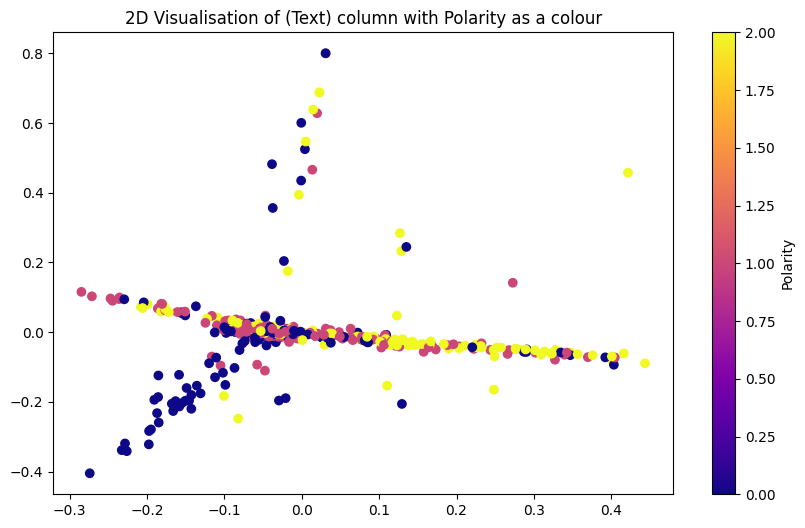

In [84]:
# Getting Tf-Idf ready
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit features for clarity
text_vectors = vectorizer.fit_transform(sentiment['Text'])


# Getting PCA ready to an output of 2 vectors
pca = PCA(n_components=2)
pca_result = pca.fit_transform(text_vectors.toarray())
pca_x_result = []
pca_y_result = []
for i in range(len(pca_result)):
  pca_x_result.append(pca_result[i][0])
  pca_y_result.append(pca_result[i][1])


# Getting plot ready and displaying
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_x_result, pca_y_result, c=sentiment['Polarity'], cmap='plasma')
plt.colorbar(scatter, label="Polarity") # 0 - negative, 1 - possitive, 2 - neutral
plt.title("2D Visualisation of (Text) column with Polarity as a colour")
plt.show()


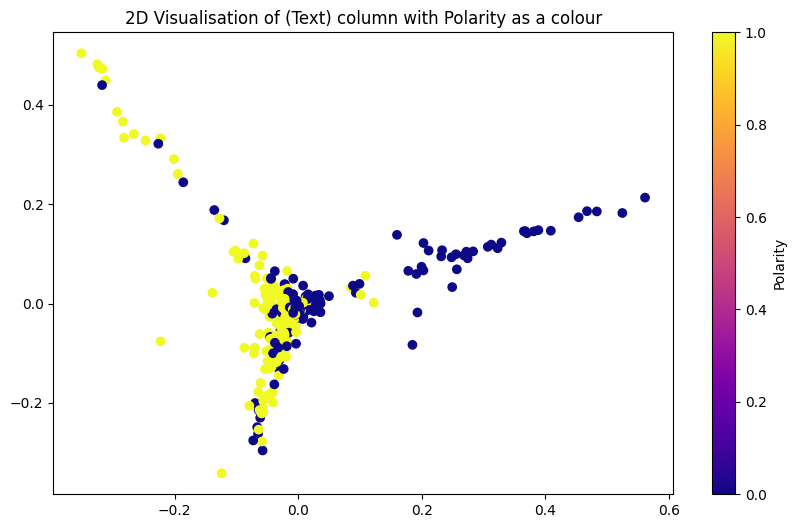

In [88]:
test_dataset = sentiment
test_dataset = test_dataset[test_dataset['Polarity'] != 2]
# Getting Tf-Idf ready
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit features for clarity
text_vectors = vectorizer.fit_transform(test_dataset['Text'])


# Getting PCA ready to an output of 2 vectors
pca = PCA(n_components=2)
pca_result = pca.fit_transform(text_vectors.toarray())
pca_x_result = []
pca_y_result = []
for i in range(len(pca_result)):
  pca_x_result.append(pca_result[i][0])
  pca_y_result.append(pca_result[i][1])


# Getting plot ready and displaying
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_x_result, pca_y_result, c=test_dataset['Polarity'], cmap='plasma')
plt.colorbar(scatter, label="Polarity") # 0 - negative, 1 - possitive, 2 - neutral
plt.title("2D Visualisation of (Text) column with Polarity as a colour")
plt.show()


#### 3D

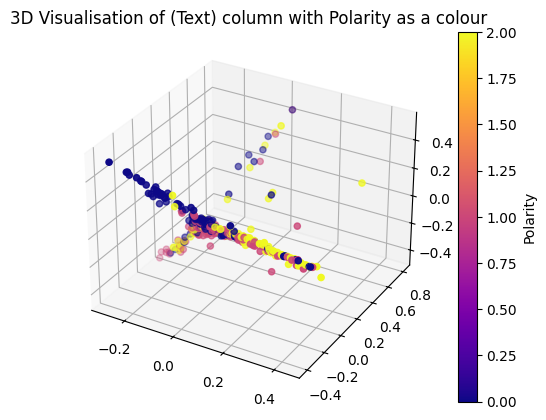

In [77]:
# Getting Tf-Idf ready
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english' )  # Limit features for clarity
text_vectors = vectorizer.fit_transform(sentiment['Text'])


# Getting PCA ready to an output of 3 vectors
pca = PCA(n_components=3)
pca_result = pca.fit_transform(text_vectors.toarray())
pac_x_result = []
pac_y_result = []
pac_z_result = []
for i in range(len(pca_result)):
  pac_x_result.append(pca_result[i][0])
  pac_y_result.append(pca_result[i][1])
  pac_z_result.append(pca_result[i][2])  # 3rd column for z values (use 3rd PCA component)


# Getting plot ready and displaying
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pac_x_result, pac_y_result, pac_z_result, c=sentiment['Polarity'], cmap='plasma')
plt.colorbar(scatter, label="Polarity") # 0 - negative, 1 - possitive, 2 - neutral
plt.title("3D Visualisation of (Text) column with Polarity as a colour")
plt.show()


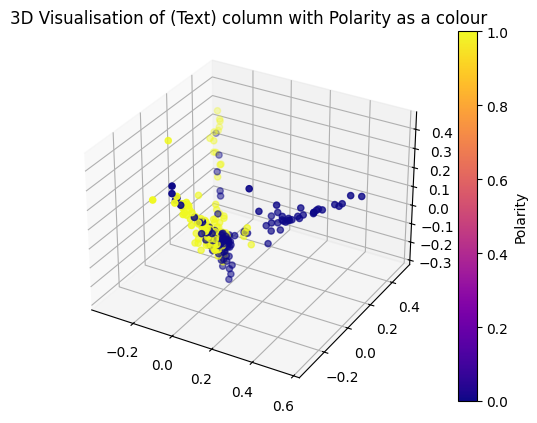

In [87]:
test_dataset = sentiment
test_dataset = test_dataset[test_dataset['Polarity'] != 2]
# Getting Tf-Idf ready
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english' )  # Limit features for clarity
text_vectors = vectorizer.fit_transform(test_dataset['Text'])


# Getting PCA ready to an output of 3 vectors
pca = PCA(n_components=3)
pca_result = pca.fit_transform(text_vectors.toarray())
pac_x_result = []
pac_y_result = []
pac_z_result = []
for i in range(len(pca_result)):
  pac_x_result.append(pca_result[i][0])
  pac_y_result.append(pca_result[i][1])
  pac_z_result.append(pca_result[i][2])  # 3rd column for z values (use 3rd PCA component)


# Getting plot ready and displaying
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pac_x_result, pac_y_result, pac_z_result, c=test_dataset['Polarity'], cmap='plasma')
plt.colorbar(scatter, label="Polarity") # 0 - negative, 1 - possitive, 2 - neutral
plt.title("3D Visualisation of (Text) column with Polarity as a colour")
plt.show()


### ELECTRA algorithm (3 labels) [16 train batch] but 2 columns

In [82]:
# Getting ELECTRA ready.
model_name = "google/electra-small-discriminator"
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=3)


# Getting dataset ready for 3 labels (in our case that's original dataset)
test_dataset = sentiment
test_dataset = test_dataset.drop(columns = ["Date", "Query", "User"])
sentiment_3_labels = test_dataset


# Getting data ready for training
def preprocess_function(input_data):
    # Renames "sentiment" to "labels"
    input_data['labels'] = input_data['Polarity']
    #returns ELECTRA tokenizer with padding(fills space if needed), truncation (if given more than 128, shrink it down). max_length... is... max_length.
    return tokenizer(input_data["Text"], padding='max_length', truncation=True, max_length=128)


# Getting data divided into train and test
train_df, test_df = train_test_split(sentiment_3_labels, test_size=0.2, random_state=322)


# Using the above data, assign them to train/test datasets for model below
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


# Getting tokenize ready with the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


# Getting trainer ready, and giving training parameters
training_args = TrainingArguments(
    output_dir="./results_electra",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
)


# Creating the trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)


# Training the model and getting performance
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results: ",eval_results)


# Getting the models accuracy
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy: ",accuracy)

'''
Evaluation of original dataset:
Evaluation results:  {'eval_loss': 1.0689224004745483, 'eval_runtime': 7.0327,
 'eval_samples_per_second': 14.219, 'eval_steps_per_second': 0.995, 'epoch': 3.0}
Accuracy:  0.48
'''

'''
Evaluation of 2 columns dataset:
Evaluation results:  {'eval_loss': 1.0590671300888062, 'eval_runtime': 12.9847,
 'eval_samples_per_second': 7.701, 'eval_steps_per_second': 0.539, 'epoch': 3.0}
Accuracy:  0.47
'''

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/396 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.079776
2,No log,1.066127
3,No log,1.059067


Evaluation results:  {'eval_loss': 1.0590671300888062, 'eval_runtime': 12.9847, 'eval_samples_per_second': 7.701, 'eval_steps_per_second': 0.539, 'epoch': 3.0}
Accuracy:  0.47


"\nEvaluation results:  {'eval_loss': 1.0689224004745483, 'eval_runtime': 7.0327,\n 'eval_samples_per_second': 14.219, 'eval_steps_per_second': 0.995, 'epoch': 3.0}\nAccuracy:  0.48\n"

### What is happening 2
The attempt was made to use Tf-Idf with matplotlib to visualize how the data would look. [stop words] were used to ignore common words such as "a","the","as"... . Unfortunately, there wasn't a clear division between the positive and negative polarity as the positives had some form of negative polarities in between, whereas negative had a clear group of points separate to the rest. Consider looking at "What is happening" in 2-3D visualisations above.

### What is happening 3

For the 2 datasets ELECTRA and XLNet were used. ELECTRA works by doing Replaced Token Detection (RTD) which means it creates some fake tokens(words) in an attempt to identify if the token is real of fake. However, the accuracy is low when compared to XLNet (61) vs (90) on 2 labels, but unlike XLNet the time it took was much better when compared to XLNet (4) vs (43) minutes. On the other hand, XLNet works by autoregressing which means it tries to identify patterns from previously seen inputs in an attempt to guess the output, it uses sequence handling which is a technique used for creating probabilities on a token level. Because of said differences, there is no surprise that they would perform differently.



### What is happening 4

In terms of evaluation, both algorithms had separate tasks which resulted in different outputs:
Name - Time (minutes), Accuracy(%)


For ELECTRA in 2-3 labels: [(4, 61), (7, 48)]

For XLNet in 2-3 labels: [(43, 90),(58, 77)]

During testing, both algorithms were tested under equal conditions, it was also found that having more batches reduces the time. To get the accuracy, sklearn was used and to get the evaluation time, trainer was used. In conclusion, if the task is to identify whether or not the input is fake, use ELECTRA, if the task is to predict a label, use XLNet. However, it is worth noting that XLNET was made in 2019 whereas ELECTRA in 2020. Additionally, the pipeline was used in the beginning but after being unable to get 3 features to work, it was dropped.
